# TravelTide K-Means Customer Segmentation
## How does our Ranked Segmentation compare to Machine Learning

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Place URL link to the line below 
#url = 'https://drive.google.com/file/d/1ovh3FL5LwG85Fm4w-5xNVOzfrKQgSKpq/view?usp=drive_link'

# Read the CSV data from the URL into a DataFrame
df = pd.read_csv('TTMetrics.csv')


In [3]:
# Dealing with some outliers in the data before scailing. This was during my experimenting with what metrics I could use. 
# After some consideration I decided not to use the 'Long Distace Traveller' metric. However I will leave this hear
# in case of any future analysis to remind me of these outliers.
# df = df[df['Long Distance Traveller'] <= 19000]


df


,user_id,% of Hotel discount,Average Hotel Discount,% of Flight discount,Average Flight Discount,% of Trips Cancelled,Weekend Traveller,Above 55 ?,Has kids?,Long Distance Traveller,Conversion rate,Bags&gt;Seats,Length of trip,Frequent traveller,Long Term Planning,Average_dollarsaved_per_km,Flight_Conversion_Rate,User Age,Bag count
0,23557,0.250000,0.175,0.000,0.000000,0.00,0,1,0,0.000000,0.250,0,0.0,2,51.833333,0.000000,0.000,64,0
1,94883,0.166667,0.100,0.000,0.000000,0.00,0,0,0,1451.335404,0.250,0,2.0,2,15.083333,0.000000,0.250,51,1
2,101486,0.076923,0.000,0.250,0.075000,0.00,1,0,1,995.681600,0.250,0,4.0,2,24.307692,0.000000,0.125,50,0
3,101961,0.083333,0.100,0.250,0.150000,0.00,0,0,0,1366.569097,0.625,0,8.0,5,3.000000,0.000727,0.625,43,2
4,106907,0.142857,0.000,0.125,0.000000,0.50,0,0,1,12797.480541,0.250,0,13.0,2,28.714286,0.000000,0.250,44,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,792549,0.000000,0.000,0.125,0.150000,0.00,0,0,0,1459.165621,0.500,0,5.0,4,2.375000,0.000000,0.500,45,2
5994,796032,0.125000,0.000,0.250,0.100000,0.25,0,0,0,4763.566102,0.500,0,9.0,4,41.875000,0.011809,0.500,50,5
5995,801660,0.000000,0.000,0.375,0.166667,0.00,0,0,1,710.553530,0.375,0,3.0,3,2.250000,0.010283,0.375,53,1
5996,811077,0.125000,0.200,0.250,0.075000,0.00,0,0,1,3223.161635,0.125,0,8.0,1,1.250000,0.000000,0.125,44,0


In [4]:
# Select relevant features for clustering (customize this)

selected_features = ['Conversion rate', 'Has kids?','% of Trips Cancelled','User Age', 'Bag count']

# Prepare the data
X = df[selected_features]

# Standardize the features if necessary
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



In [5]:
# Choose the number of clusters (customize this)
num_clusters = 5
 

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = clusters

In [6]:
X_scaled.describe().round()

,Conversion rate,Has kids?,% of Trips Cancelled,User Age,Bag count
count,5998.0,5998.0,5998.0,5998.0,5998.0
mean,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-0.0,-2.0,-1.0
25%,-1.0,-1.0,-0.0,-1.0,-1.0
50%,0.0,-1.0,-0.0,-0.0,-0.0
75%,1.0,1.0,-0.0,1.0,0.0
max,3.0,1.0,10.0,4.0,11.0


#  Reasoning behind each metric and Perk we associate them, when using SQL clustering


# Free Meal Perk

Our "Free Meal" benefit is designed to cater to a wide range of users. It provides a complimentary meal to seniors aged 55 and over to make their travel experience more comfortable. For frequent travelers who have taken more than 2 trips, it adds extra value and ease to their trip. Additionally, it ensures that families traveling with children have a safe family-friendly experience.

# Free Bag Perk

The "Free Bag" benefit is tailored to specific user needs. It targets long-distance travelers by considering how far they typically travel. It also caters to travelers who need extra baggage by comparing the number of checked bags to the number of booked seats. For those on longer trips, it offers peace of mind regarding additional luggage.

# No Cancellation Fees

Our "No Cancellation Fees" benefit is designed to accommodate different user behaviors. It provides flexibility for users with a history of cancellations, making their travel plans more convenient. It also recognizes and rewards forward planners who make advance bookings. Furthermore, it incentivises idle browsers to make bookings by eliminating cancellation fees.

# Exclusive Discounts

The "Exclusive Discounts" benefit focuses on helping users save on flights. It appeals to users based on the average amount of flight discounts they receive. It caters to deal-seekers by considering the proportion of their trips with flight discounts. Additionally, it engages cost-conscious travelers by highlighting the average dollars saved per kilometer traveled.

# 1 Night Free Hotel

Our "1 Night Free Hotel Stay" benefit is strategically designed to attract users. It offers a free night's stay in a hotel, enticing users with the proportion of trips that include hotel discounts. It appeals to savvy spenders by showcasing the average hotel discount they receive. Furthermore, it caters to weekend explorers who are looking to eliminate a chunk of the expenses from their trips.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Conversion rate  Has kids?  % of Trips Cancelled  User Age  Bag count
0         0.995227  -0.605818             -0.245275  0.072184   0.834840
1        -0.135064   1.436430             -0.303048  0.191240  -0.127801
2        -0.435424  -0.696171             -0.303645  0.773091  -0.500014
3        -0.927754  -0.359024             -0.305561 -1.311303  -0.688455
4         0.587148   0.068870              2.922376 -0.108985   0.698866


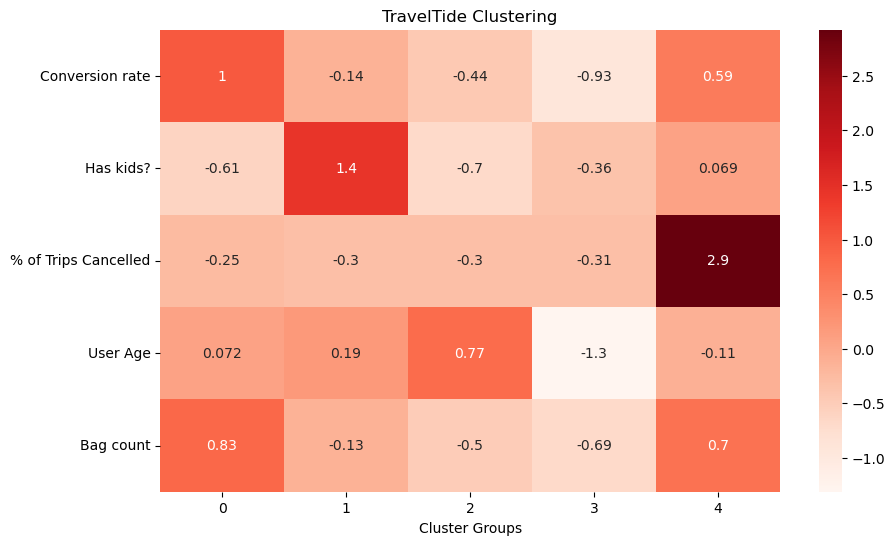

In [7]:
#model_centroids = pd.DataFrame(model.cluster_centers_, columns=X.columns)
#display(model_centroids)
model = KMeans(n_clusters=5, random_state=0)
model.fit(X_scaled)
# Explore cluster characteristics
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=selected_features)
print(cluster_centers)

# Visualize the clusters (for 2D data)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers.T, annot=True, cmap='Reds')
plt.xlabel('Cluster Groups')
plt.title('TravelTide Clustering')
plt.show()




# You can now analyze and interpret the clusters based on your specific data and goals.

#  Understanding the Cluster and the Perk it relates to



In [8]:
cluster_dict = {0: 'Free Baggage',
                1: '1 Night Free Hotel',
                2: 'Free Meal at Hotel',
                3: 'Exclusive Discounts',
                4: 'No Cancellation Fees'}

In [9]:
labelled_perks = (X.reset_index(drop=True)
                   .join(pd.Series(model.labels_, name="cluster_label", dtype='object').map(cluster_dict)))
cluster_centers.index = cluster_centers.index.map(cluster_dict)
grouped_df = labelled_perks.groupby("cluster_label").mean()
labelled_perks.groupby("cluster_label").mean()

,Conversion rate,Has kids?,% of Trips Cancelled,User Age,Bag count
cluster_label,,,,,
1 Night Free Hotel,0.313925,1.000000,0.000239,43.352903,1.225701
Exclusive Discounts,0.162083,0.158092,0.000000,25.251637,0.414406
Free Baggage,0.530436,0.042367,0.005739,41.918628,2.618695
Free Meal at Hotel,0.256390,0.000000,0.000182,50.362509,0.687090
No Cancellation Fees,0.452267,0.358736,0.307280,39.736059,2.421933


Our k-means analysis appears to be validated, as the cluster labels align quite well with the actual underlying data points. Please refer to the subsequent sections in the notebook for further explanation between each cluster and associated perk.

# Inter Cluster Values

In [10]:
X_scaled['cluster_label'] = pd.Series(model.labels_, name="cluster_label", dtype='object').map(cluster_dict)

In [11]:
from sklearn.metrics.pairwise import euclidean_distances

# Create an empty list to store results
results = []

for cluster in cluster_centers.index:
    cluster_sample = X_scaled.loc[X_scaled["cluster_label"] == cluster]

    # Calculate Euclidean distances between cluster data points and the centroid
    distances = euclidean_distances(cluster_sample.iloc[:, :-1], cluster_centers.loc[cluster, :].values.reshape(1, -1))

    # Calculate the mean distance
    mean_distance = distances.mean()

    # Append the result to the results list
    results.append({'Perk': cluster, 'dist_center': mean_distance})

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)


result_df

,Perk,dist_center
0,Free Baggage,1.217940
1,1 Night Free Hotel,1.222548
2,Free Meal at Hotel,1.098459
3,Exclusive Discounts,1.140678
4,No Cancellation Fees,2.344718


The Free Baggage cluster exhibits the highest level of compactness, implying that all users within this cluster are closely grouped together. In contrast, our No Cancellation Fees cluster demonstrates the lowest level of compactness, indicating that users in this particular cluster exhibit a greater degree of variation in their distances from the cluster's centroid.

However, when we observe that the scores are generally uniform and low across all the clusters, it suggests that the clustering is likely distinct for each Perk.

# User Age Distribution

<Axes: xlabel='User Age', ylabel='Density'>

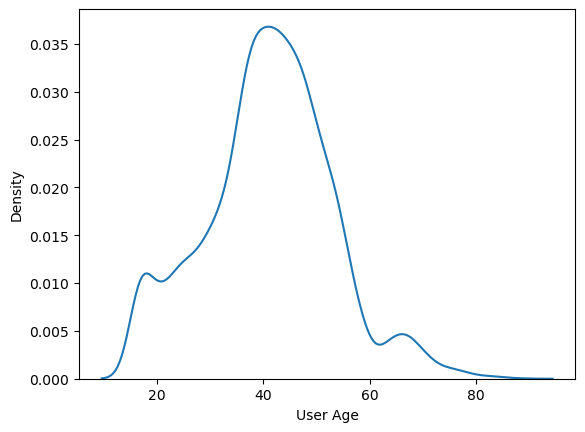

In [12]:
sns.kdeplot(X['User Age'])

In [13]:
X['User Age'].median()

41.0

In [14]:
X['User Age'].mean()

41.049016338779595

The majority of our user base falls within the age range of 30 to 55 years. This demographic composition underscores that the largest segment of TravelTides' audience comprises middle-aged adults. Armed with this insight, TravelTides can strategically leverage this information to tailor its advertising campaigns to be particularly appealing to this specific demographic.

Another significant observation pertains to the fact that the median and mean age of our cohort is 41. This signifies the predominant age within our user base and, by extension, the age bracket that encompasses it. This information empowers us to adopt more discerning and precisely targeted strategies in our interactions with our audience, catering more effectively to their preferences and expectations from our business.

# How K-Means worked within the logic of this project

After conducting our K-Means analysis, we have identified various combinations of metrics suitable for customer segmentation. Through a series of experiments, we determined that the removal of specific metrics from our K-Means analysis led to distinct clusters aligning with the hypothesized perks outlined by Elena.

Utilizing K-Means, we discerned that it is unnecessary to include all our metrics to achieve clear clustering corresponding to each perk.

Initially, I attempted to incorporate all the metrics I had created into the K-Means algorithm. However, this approach resulted in skewed values within the visual representation. I conducted numerous experiments with different combinations of measured behaviors until a discernible pattern in the data emerged, one that could be attributed to specific user behavior types. Remarkably, these identified behaviors closely correlated with Elena's hypothesized perks.

To precede the K-Means grouping process, I devised a new metric that treats user age ['User Age'] as a continuous variable rather than a binary categorization (above 55 or not above 55). This approach facilitates a less polarized segmentation based on user age and effectively addresses the issue associated with the ['Above 55?'] metric, which produced considerably high standard deviation values, subsequently affecting the overall outcome of the K-Means analysis. Furthermore, I introduced a novel metric to gauge the number of bags each user had during their travels, as opposed to using a binary factor to determine if they had more bags than seat bookings, as this was found to skew our analysis.

In [15]:
cluster_counts = labelled_perks['cluster_label'].value_counts()
cluster_counts

1 Night Free Hotel      1533
Free Baggage            1487
Free Meal at Hotel      1371
Exclusive Discounts     1069
No Cancellation Fees     538
Name: cluster_label, dtype: int64

Upon examining the distribution of our analysis, it becomes evident that certain benefits exhibit greater prominence than others. For instance, it is apparent that the cluster associated with "No Cancellation Fees" is considerably smaller in comparison to the others. Conversely, there is a notable prevalence of users who exhibit an affinity towards "1 Free Night Stay at Hotel" and "1 Free Hold Bag." This observation may serve as an indicative representation of the behavioural patterns within the broader user population on our platform. 


# Cluster Explanations


# Cluster 0

## Free Hold Baggage 
selected_features = ['Conversion rate', 'Has kids?','% of Trips Cancelled','User Age', 'Bag count']

High Conversion Rate, suggestinng they are frequent travellers
High Count of Bags

Following the observations I have made from the K-Means clustering, I would suggest that this specific cohort comprises individuals who frequently embark on journeys and regularly make reservations on our website, showing the highest score within their respective clusters when it comes to the number of bags they carry. In light of these behavioural patterns and insights, I would recommend extending to this group the "Free Hold Baggage" benefit.

This recommendation is founded on the discernible affinity this cohort exhibits towards the quantity of luggage they require for their travels, coupled with their consistent usage and satisfaction with our website. Consequently, I believe that offering them this discount will incentivise them to maintain their patronage of Travel Tide while also making practical use of the discount on their journeys.


# Cluster 1
## 1 Night Free Hotel When Booking Flights
selected_features = ['Conversion rate', 'Has kids?','% of Trips Cancelled','User Age', 'Bag count']

User Age slightly higher than the rest,
Has Kids Highest,
Slightly below average Conversion Rate

Based on the data I have observed, I would assume these are families who are traveling with their children. Given these observed behaviours and insights, I would recommend that this particular cohort be granted the "One Complimentary Night's Accommodation with Flight Inclusion" perk.

This recommendation stems from their below-average conversion rate, which implies the family could be slightly financially frugal in their travel decisions. Airbnb is largely used by the younger generation. As we can see, this cohort is made up of users in their middle age and would most likely, when travelling with their family, opt for a trusted hotel rather than an Airbnb. This preference, coupled with their inclination towards fiscal responsibility, suggests that they would value a complimentary one-night stay at a hotel.

('https://www.dreambigtravelfarblog.com/blog/airbnb-statistics' - AirBnB Statistics 2023)


# Cluster 2
## Free Meal at Hotel
selected_features = ['Conversion rate', 'Has kids?','% of Trips Cancelled','User Age', 'Bag count']

Highest Age out of the clusters,
Likely not travelling with kids due to low score,
Not travelling too frequently (maybe just for special ocassions)

Based on the data I've observed, it's reasonable to assume that this specific cohort consists of the older middle-aged group. Given these behavioural patterns and insights, I would recommend offering this group the "One Complimentary Meal at a Hotel" perk.

This recommendation is motivated by their Higher age; therefore, they may prefer the convenience of having a meal at a hotel. Moreover, it appears that they might not be travelling with children frequently, possibly reserving their trips for special occasions. This combination of factors, including their higher age within the clusters and the likelihood of preferring hotels, suggests that they would highly appreciate a complimentary meal at a hotel during their stay.


# Cluster 3
## Exclusive Discounts
selected_features = ['Conversion rate', 'Has kids?','% of Trips Cancelled','User Age', 'Bag count']

Low Conversion Rate, 
Low Age,
Infrequent Traveller 

Within this cluster, I have identified a noticeable group of young individuals who are actively engaged with our website. However, they haven't converted this enthusiasm of searching for trips into actual bookings. This is indicated by their low conversion rate score. I also observed the age distribution within this group leans towards a younger demographic compared to our average user age. Additionally, their Frequent Traveller score could align with this age-related bias.

Based on these behaviours, I would deduce this group is comprised of young professionals. These individuals are most likely still studying or recently having started their professional careers, which could suggest they are feeling a constraint on their finances and are having to dedicate a large amount of time to their professional lives, leaving them with not much time or money to enjoy travelling. Nevertheless, their enthusiasm for travel could be high, and they would be highly receptive to travel incentives in the form of exclusive discounts.

In consideration of these observations, it is my view that this specific cohort represents an ideal target audience for the introduction of our 'Exclusive Discounts Perk.' This perk resonates with those who are looking for a bargain alongside the wanderlust to go and explore!


# Cluster 4
## No Cancellation Fees
selected_features = ['Conversion rate', 'Has kids?','% of Trips Cancelled','User Age', 'Bag count']

High STDEV from Centre on % of Trips Canccelled
Above average frequency in conversion rate and travelling 

Based on the data analysis conducted, it is reasonable to deduce that this specific cohort predominantly consists of users who have previously encountered the need to cancel their reservations through our platform. In light of these discernible behavioural patterns and insights, I propose recommending the introduction of the "No Cancellation Fees" perk to cater to the preferences of this demographic.

This recommendation is underpinned by the substantial prevalence of cancellations within the "% of Trips Cancelled" metric observed within this cluster. This heightened occurrence of trip cancellations implies a frequent need for flexibility in their travel plans. Given both the elevated "% of Trips Cancelled" statistic within this cohort and their above-average conversion rate, as well as their overall travel frequency, it is evident that they place a significant premium on the ability to modify their travel arrangements without incurring cancellation fees. Consequently, offering the "No Cancellation Fees" perk is poised to resonate strongly with this demographic and enhance their satisfaction with our services.